<a href="https://colab.research.google.com/github/adnlab/Mini_Project_Data/blob/main/Dicoding_Predictive_Analytics_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Diri

Adnan Muhammad Lazuardi

adnanm.lazuardi@gmail.com

# Domain Proyek

## Latar Belakang
Suatu perusahaan e-commerce menyediakan platform jual/beli mobil bekas bagi pemilik mobil yang hendak menjual mobilnya. 

Pemilik mobil dapat mendaftarkan mobilnya pada platform tersebut dengan melengkapi informasi terkait mobil yang hendak dijual. Berdasarkan informasi yang disertakan, sistem e-commerce akan memberikan rekomendasi harga jual mobil sebagai opsi harga.

## Kenapa sistem otomasi ini diperlukan?

Dengan adanya fitur rekomendasi harga jual mobil, pengguna akan memiliki acuan harga yang sesuai untuk mobil dengan spesifikasi terkait. Selain itu, ini akan memudahkan pengguna karena tidak perlu menghabiskan banyak waktu untuk melakukan riset harga pasar.

## Bagaimana rekomendasi dapat menyelesaikan masalah?

Sistem machine learning yang saya miliki akan memberikan rekomendasi harga jual dengan mempertimbangkan fitur-fitur yang paling signifikan mempengaruhi harga mobil dari data yang saya miliki. Sehingga, sistem saya dapat memberikan prediksi harga jual untuk mobil yang pengguna hendak jual berdasarkan informasi yang dimasukkan pada sistem.

# Business Understanding

## Problem Statements

- Fitur apa saja yang paling berpengaruh terhadap harga jual mobil?
- Berapa harga jual yang dapat diberikan untuk mobil berdasarkan fitur-fitur utama mobil?

## Goals

- Menentukan fitur yang paling berpengaruh terhadap harga jual mobil
- Memprediksi harga jual untuk mobil dengan spesifikasi tertentu

## Solution Statements

- Menghitung korelasi antar fitur untuk mengetahui signifikansi dari tiap fitur terhadap harga.
- Menggunakan algoritma KNN, Random Forest, dan Boosting Algorithm untuk memprediksi harga jual.
- Membandingkan tiga algoritma machine learning tersebut untuk memperoleh model dengan performa paling baik.

# Data Understanding

Dalam kasus kali ini, saya akan menggunakan dataset yang diperoleh dari https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes. Data berupa daftar mobil dengan spesifikasi tertentu beserta harga jualnya yang dikelompokkan berdasarkan produsen mobilnya. Dalam kasus ini, kita akan fokus pada data penjualan untuk mobil bermerk Ford  (untuk menghindari bias harga karena perbedaan manufaktur mobil).

Dataset ini memiliki 17.965 daftar penjualan mobil untuk berbagai jenis/model mobil dengan karakteristik tertentu. Karakteristik tersebut ialah fitur bertipe data numerik dan non-numerik. Karakteristik tersebut digunakan untuk menentukan harga.

Deskripsi kolom pada dataset:
- Model: tipe mobil dari produsen mobil terkait, bersifat kategorikal atau non-numerik.
- Year: tahun dimana mobil telah terdaftar sebagai kendaraan yang legal, bersifat numerik.
- Price: harga penjualan mobil dalam euro, bersifat numerik.
- Transmission: jenis transmisi mobil, bersifat kategorikal atau non-numerik.
- Mileage: total jarak yang telah ditempuh mobil sejak pertama kali digunakan dalam mil, bersifat numerik.
- FuelType: jenis bahan bakar yang digunakan mobil, bersifat kategorikal atau non-numerik.
- Tax: besar pajak yang harus dibayarkan untuk mobil pertahunnya dalam euro, bersifat numerik.
- MPG: jumlah jarak yang bisa ditempuh mobil dalam mil per satu galon bahan bakar.
- EngineSize: ukuran mesin mobil dalam liter, bersifat numerik.

Untuk memahami data, saya melakukan:
- EDA sederhana dengan menggunakan **describe()** untuk mengetahui apakah terdapat keganjilan pada data.

## Data Loading

Dalam tahapan ini, saya melakukan loading data dari website kaggle dengan menggunakan kaggle command.

In [ ]:
import zipfile,os

!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d adityadesai13/used-car-dataset-ford-and-mercedes
!unzip used-car-dataset-ford-and-mercedes.zip -d /tmp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
used-car-dataset-ford-and-mercedes.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  used-car-dataset-ford-and-mercedes.zip
replace /tmp/audi.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Kemudian saya membaca dataset yang telah di-download. Kali ini saya ingin fokus pada satu manufaktur mobil yaitu Ford. Saya tidak menggabungkan data dari seluruh manufaktur mobil karena saya menganggap hal tersebut akan menyebabkan bias pada prediksi harga.

In [ ]:
import pandas as pd

df = pd.read_csv('/tmp/ford.csv')

Melihat data dan deskripsi data

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


Dengan menggunakan **df.info()**, saya mengetahui bahwa terdapat data penjualan mobil sejumlah 17965 dengan masing-masing memiliki 9 kolom yang terdiri dari data berupa kategorikal (object) dan numerik (int, float).

Dalam dataset tersebut tidak ada kekosongan data.

## Exploratory Data Analysis

Dalam tahapan ini, saya mencoba untuk menganalisis apakah terdapat kejanggalan pada data.

### Missing Value

In [ ]:
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
categorical_features = ['model', 'transmission', 'fuelType']

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


**Data tidak valid dan hilang**
- keberadaan data yang melebihi tahun 2020 yaitu tahun terakhir dataset diupdate.
- terdapat enginesize yang bernilai nol
- terdapat kendaraan yang tidak perlu membayar pajak

## Outlier

Saya membuat visualisasi boxplot untuk mengetahui distribusi data sehingga dapat diketahui bagian data yang menjadi outlier.

Membuat boxplot untuk data numerik, mileage

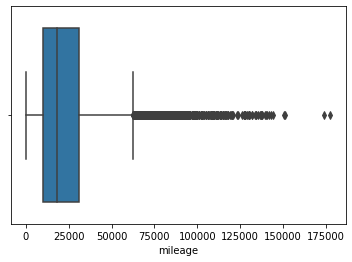

In [ ]:
import seaborn as sns
sns.boxplot(x=df['mileage'])

Membuat boxplot untuk data numerik, tax

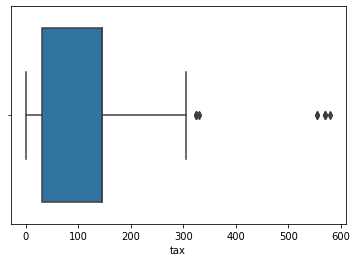

In [ ]:
sns.boxplot(x=df['tax'])

Membuat boxplot untuk data numerik, mpg

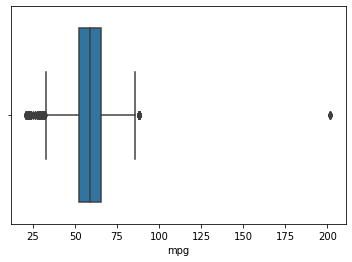

In [ ]:
sns.boxplot(x=df['mpg'])

Membuat boxplot untuk data numerik, engineSize

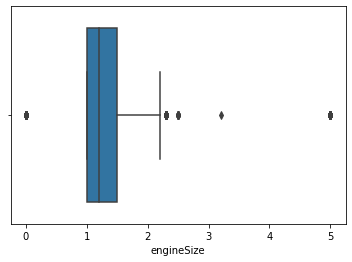

In [ ]:
sns.boxplot(x=df['engineSize'])

Berdasarkan visualisasi diatas, ada outlier yang cukup banyak sehingga agar data tidak menimbulkan bias kita akan menghapusnya.

## Univariate Analysis

Dalam tahapan ini, saya mencoba untuk mempelajari distribusi dari tiap fitur yang ada.

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dts = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dts)

                        jumlah sampel  persentase
 Fiesta                          6557        36.5
 Focus                           4588        25.5
 Kuga                            2225        12.4
 EcoSport                        1143         6.4
 C-MAX                            543         3.0
 Ka+                              531         3.0
 Mondeo                           526         2.9
 B-MAX                            355         2.0
 S-MAX                            296         1.6
 Grand C-MAX                      247         1.4
 Galaxy                           228         1.3
 Edge                             208         1.2
 KA                               199         1.1
 Puma                              80         0.4
 Tourneo Custom                    69         0.4
 Grand Tourneo Connect             59         0.3
 Mustang                           57         0.3
 Tourneo Connect                   33         0.2
 Fusion                            16         0.1


Karena data penjualan mobil selain 5 model teratas hanya sedikit sehingga dirasa tidak cukup untuk digunakan dalam melatih model machine learing. Saya hanya mengambil data 5 model mobil teratas saja yaitu Fiesta, Focus, Kuga, EcoSport, dan Ka+. 

In [ ]:
df = df[df.model.isin([' Fiesta', ' Focus', ' Kuga', ' EcoSport', ' Ka+'])].reset_index(drop=True)

Melihat distribusi data kategorik, transmission

           jumlah sampel  persentase
Manual             13365        88.8
Automatic            928         6.2
Semi-Auto            751         5.0


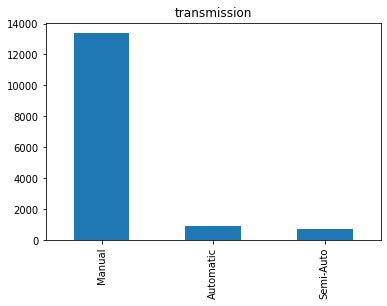

In [ ]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dts = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dts)
count.plot(kind='bar', title=feature);

Melihat distribusi data kategorik, fuelType

        jumlah sampel  persentase
Petrol          11126        74.0
Diesel           3913        26.0
Hybrid              5         0.0


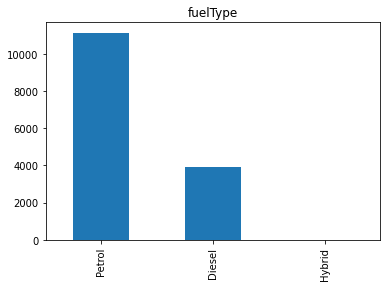

In [ ]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dts = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dts)
count.plot(kind='bar', title=feature);

Melihat distribusi data numerik

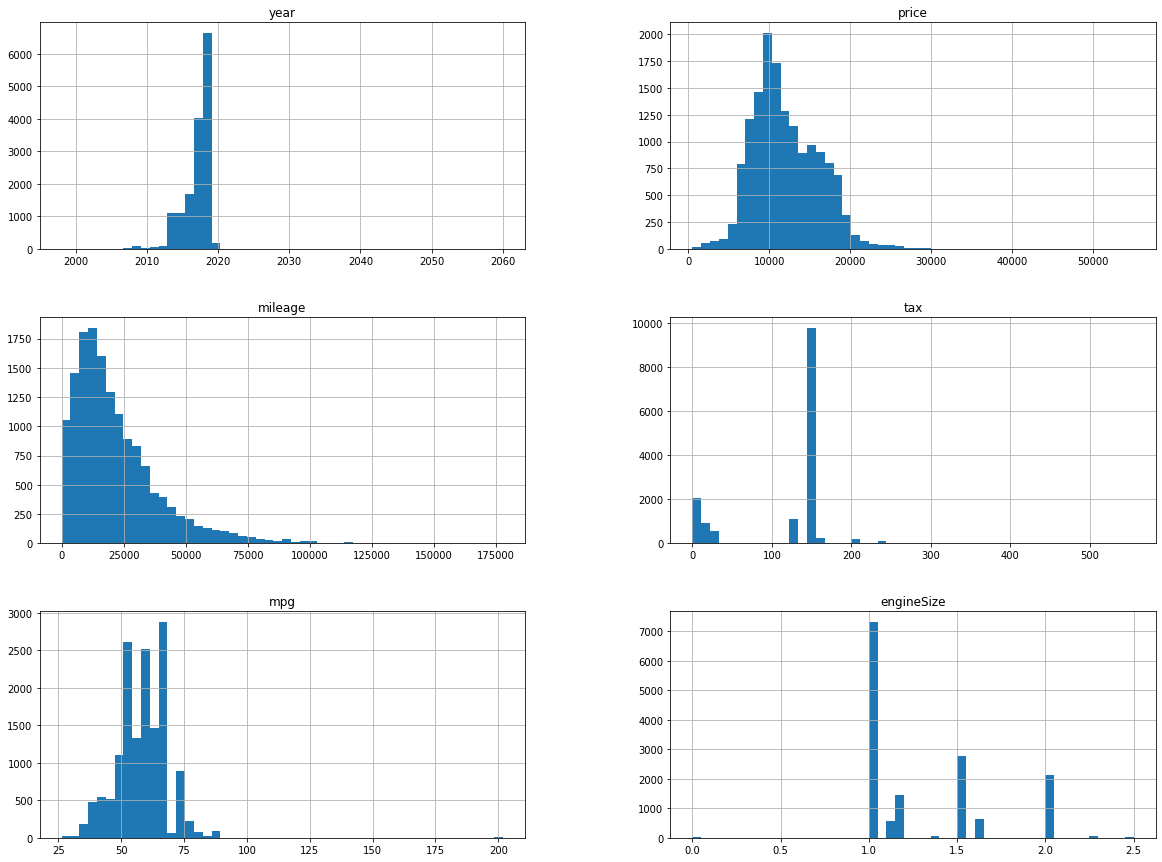

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

Dalam tahapan ini, saya mencoba untuk melihat pengaruh fitur-fitur yang ada terhadap harga penjualan mobil.

**Data Kategorikal**

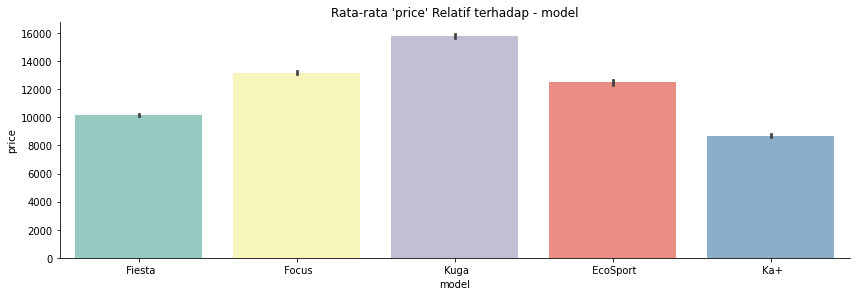

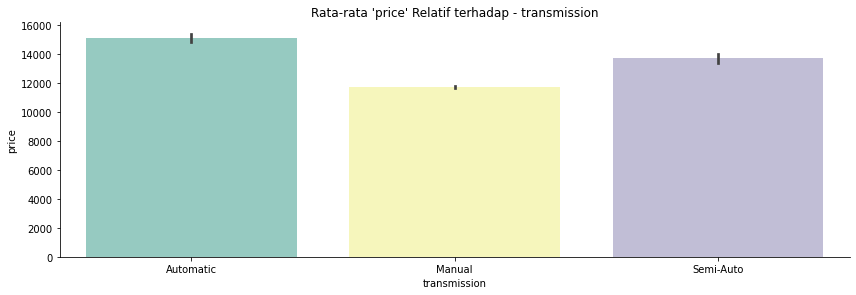

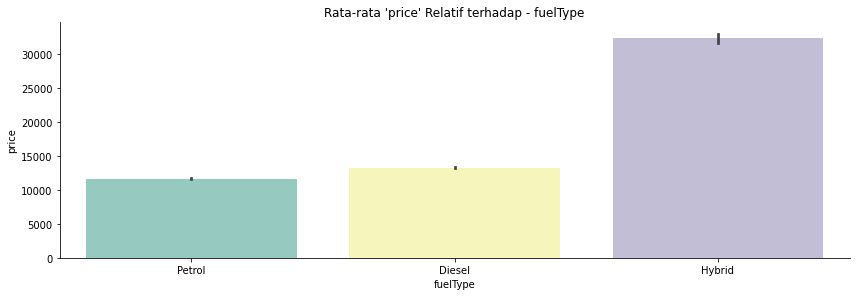

In [ ]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

**Data Numerik**

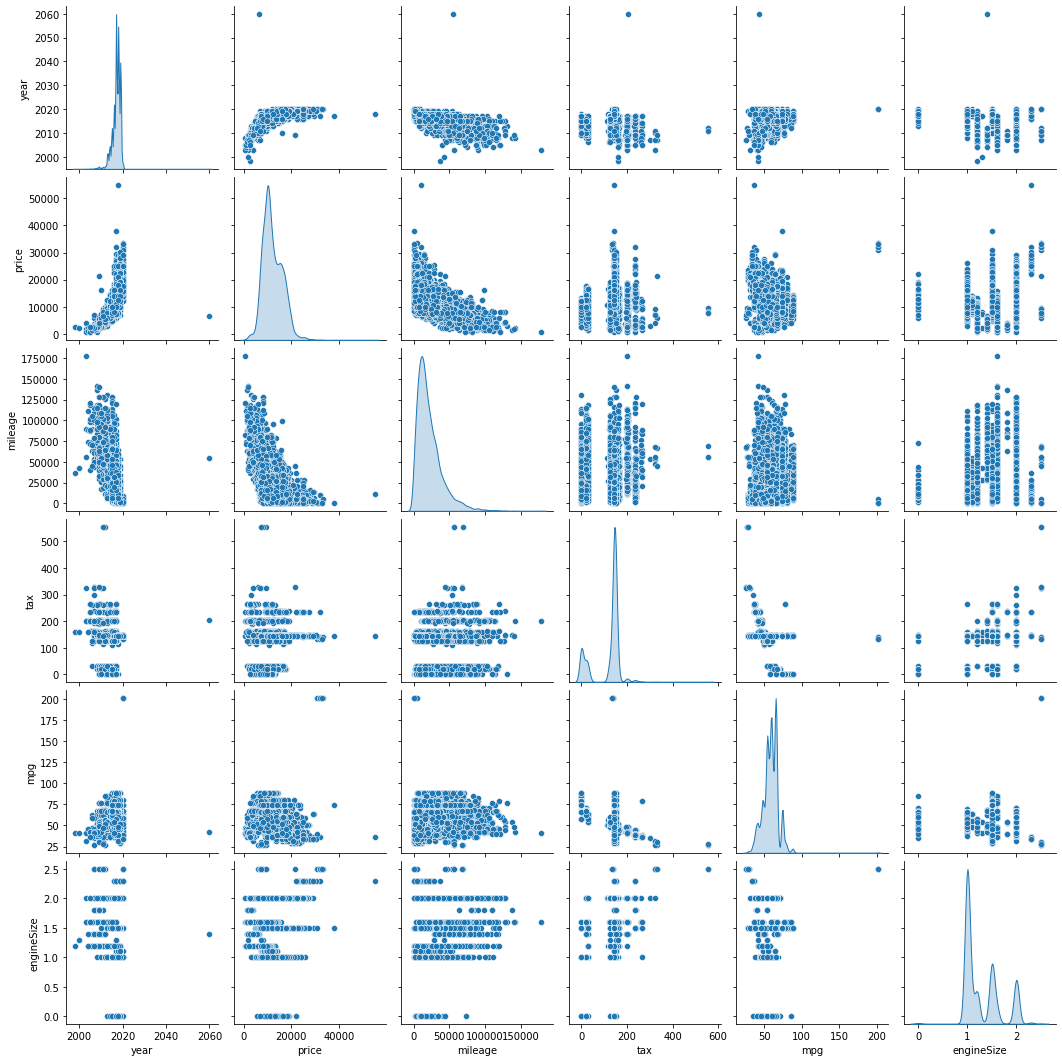

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Untuk penilaian pengaruh secara kuantitatif, saya membuat heatmap yang menunjukkan korelasi antar fitur.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

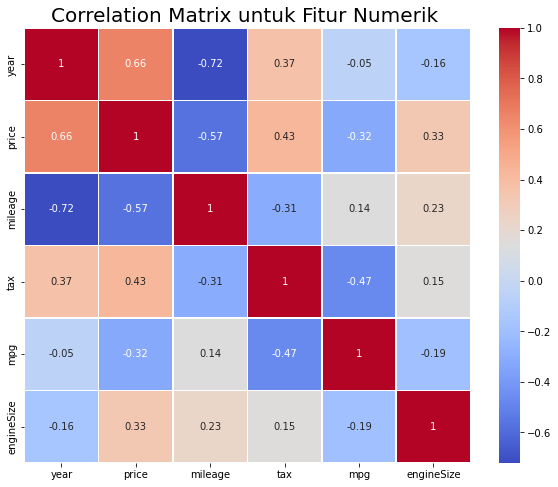

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan heatmap diatas, kita mengetahui bahwa harga jual akan berkurang seiring bertambahnya mileage, tax, dan mpg. Selain itu, harga jual akan meningkat seiring bertambahnya engineSize dan semakin baru mobil tersebut. Saya menggunakan semua fitur untuk pelatihan model machine learning karena setiap fitur memiliki korelasi yang cukup tinggi.

Tapi data ini merupakan data yang belum dibersihkan, sehingga nanti kita akan menghitungnya lagi untuk data yang telah bersih.

# Data Preparation

Dalam tahapan ini, saya mempersiapkan data untuk digunakan pada tahapan pembuatan dan pelatihan machine learning.

## Exploratory Data Analysis

### Missing Value 

Karena dataset terakhir kali di update pada tahun 2020, saya menghapus data penjualan mobil untuk tahun 2020 keatas.

In [ ]:
df = df[df.year <= 2020]

Berdasarkan **data.describe()** saya mengetahui terdapat mobil yang memiliki **engineSize** berukuran nol. Menurut keterangan author dataset (pemilik dataset), hal tersebut dikarenakan mobil tersebut merupakan mobil listrik.

Karena mobil listrik tidak membutuhkan bahan bakar, data untuk mobil dengan **engineSize** bernilai nol menjadi tidak valid sehingga saya akan menghapus data tersebut.

Selain itu, saya juga menghapus data mobil yang tidak perlu membayar pajak.

In [ ]:
df = df.loc[(df[['tax','engineSize']]!=0).all(axis=1)]

### Outlier

Outlier dihilangkan dengan menggunakan metode IQR, digunakan karena metode yang cukup sederhana.

Dalam tahapan ini, saya mengambil data yang sentral saja dengan mengabaikan data-data outlier. Hal ini perlu dilakukan untuk menghindari bias dalam mempertimbangkan kontribusi tiap fitur. Selain itu, hal ini dilakukan untuk mengurangi kecenderungan data pada salah satu sisi agar mendekati distribusi normal.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1

df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


Melihat data yang telah diproses

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,7255.000000,7255.000000,7255.000000,7255.0,7255.000000,7255.000000
mean,2018.030737,13663.958649,14237.361957,145.0,57.579173,1.251303
std,0.792346,3419.205656,9518.016153,0.0,8.244513,0.362699
min,2016.000000,6450.000000,1.000000,145.0,36.700000,1.000000
25%,2017.000000,10893.500000,7269.000000,145.0,54.300000,1.000000
50%,2018.000000,13295.000000,12459.000000,145.0,58.900000,1.000000
75%,2019.000000,16399.000000,19164.000000,145.0,64.200000,1.500000
max,2019.000000,23999.000000,53499.000000,145.0,78.500000,2.000000


Karena kolom tax hanya memiliki satu nilai, maka kolom tax tidak saya gunakan untuk pelatihan model machine learning.

In [ ]:
df.drop(['tax'], inplace=True, axis=1)

Melihat korelasi setelah data dibersihkan

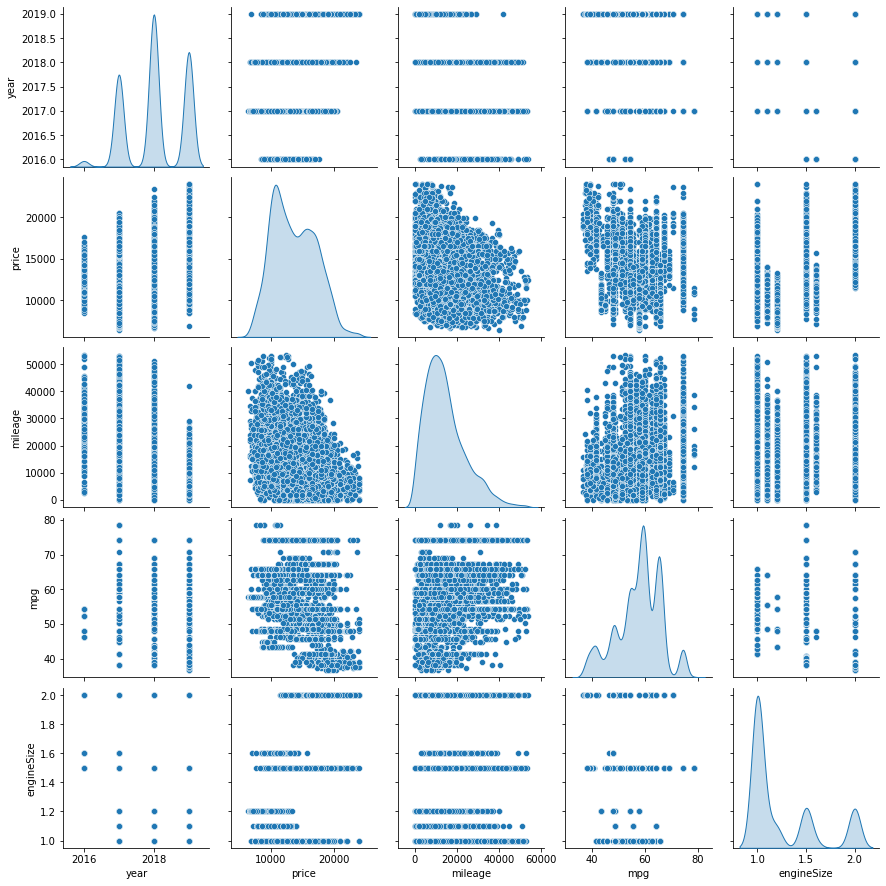

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

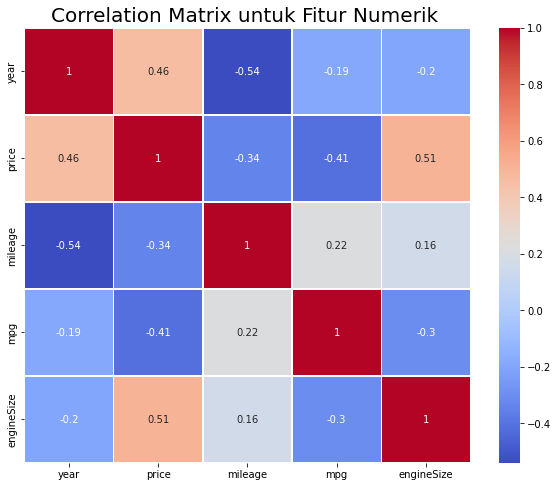

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan heatmap diatas, kita mengetahui bahwa harga jual akan berkurang seiring bertambahnya mileage dan mpg. Selain itu, harga jual akan meningkat seiring bertambahnya engineSize dan semakin baru mobil tersebut. Saya menggunakan semua fitur untuk pelatihan model machine learning karena setiap fitur memiliki korelasi yang cukup tinggi.

## Data Preprocessing

Dalam tahapan ini, saya mengubah semua data bertipe kategorikal kedalam data numerik agar dapat digunakan dalam model machine learning. Hal ini perlu dilakukan agar tipe data yang digunakan sesuai dengan tipe data machine learning yang akan kita gunakan, yaitu KNN, Random Forest, dan Boosting Algorithm. Selain itu, hal ini dapat meningkatkan performa prediksi dari model terkait.

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['model'], prefix='model')],axis=1)
df = pd.concat([df, pd.get_dummies(df['transmission'], prefix='transmission')],axis=1)
df = pd.concat([df, pd.get_dummies(df['fuelType'], prefix='fuelType')],axis=1)
df.drop(['model','transmission','fuelType'], axis=1, inplace=True)
df.head()

,year,price,mileage,mpg,engineSize,model_ EcoSport,model_ Fiesta,model_ Focus,model_ Ka+,model_ Kuga,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Petrol
3,2019,17500,10460,40.3,1.5,0,1,0,0,0,0,1,0,0,1
4,2019,16500,1482,48.7,1.0,0,1,0,0,0,1,0,0,0,1
6,2017,9000,13054,54.3,1.2,0,1,0,0,0,0,1,0,0,1
8,2018,10000,48141,61.4,1.0,0,0,1,0,0,0,1,0,0,1
9,2018,11561,18803,56.5,1.0,0,1,0,0,0,0,1,0,0,1


Dalam tahapan ini, saya membagi dataset kedalam data pelatihan dan data pengujian agar kita dapat menguji model machine learning pada data baru yang belum dipelajari oleh model sehingga dapat menghindari bias dalam prediksi.


In [ ]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["price"],axis =1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

# Modeling

Dalam tahapan ini, saya mencoba untuk melatih model dengan menggunakan algoritma machine learning KNN, Boosting Algorithm, dan Random Forest.

Dalam pengembangan model machine learning, saya akan menggunakan model yang paling sederhana dari setiap algoritma machine learning kemudian membandingkan performa dari 3 algoritma yang saya gunakan.

Sebelum melakukan pelatihan model, saya mempersiapkan dataframe untuk menampung nilai mse untuk performa model dari tiap algoritma machine learning.

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

Dalam kasus ini, saya menggunakan KNN untuk keperluan regresi. KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat. KNN melatih model dengan menghitung rata-rata dari sejumlah k tetangga terdekat dalam suatu rentang nilai dimana nilai rata-rata tersebut dianggap sebagai suatu titik baru yang digunakan untuk melatih model.

Kumpulan titik hasil rata-rata dari tetangga terdekat kemudian dihubungkan untuk memperoleh suatu garis data yang menggambarkan data. Prediksi dilakukan dengan melakukan hal yang sama pada data paling akhir.

Untuk mengembangkan model KNN sederhana, model hanya membutuhkan parameter jumlah tetangga. Untuk itu, saya menggunakan jumlah tetangga terdekat sebanyak 10 karena karakter dataset memiliki variasi yang cukup besar.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Dalam kasus ini, saya menggunakan Random Forest untuk keperluan regresi. Algoritma ini bekerja dengan membagi dataset kedalam bagian-bagian kecil (pohon) yang berbeda terhadap satu sama lain. Model akan mempelajari pohon tersebut dan menghasilkan prediksinya terhadap data. Pohon-pohon tersebut kemudian akan dipecah lagi (splitting) dan membentuk cabang baru yang akan dipelajari lagi. Splitting akan berlangsung sepanjang yang ditentukan. Prediksi akhir akan diperoleh dengan mengambil rata-rata prediksi seluruh pohon.

Untuk mengembangkan model Random Forest sederhana, model hanya membutuhkan parameter terkait jumlah pohon, jumlah maksimal cabang, jumlah random generator, dan bagaimana model akan mempelajari seluruh pohon.

Dalam kasus ini, saya membagi dataset kedalam 50 pohon yang mana akan dikerjakan secara paralel. Pohon tersebut kemudian akan melakukan splitting hingga 16 cabang. Nilai ini dipilih karena ia memiliki nilai yang cukup (tidak terlalu besar sehingga memperlambat proses dan tidak terlalu kecil sehingga tidak dapat mempelajari data dengan baik).

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

Dalam kasus ini, saya menggunakan Boosting Algorithm untuk keperluan regresi. Algoritma ini bekerja dengan mempelajari dataset secara bertahap. Model akan mempelajari dataset awal, kemudian mempelajari kesalahan dari model tersebut dan memperbaikinya untuk kembali mempelajari dataset. Hal tersebut berulang sebanyak jumlah iterasi yang ditentukan.

Untuk mengembangkan model Boosting Algorithm sederhana, model hanya membutuhkan nilai learning rate dan random state. Untuk itu, saya menggunakan learning rate 0,01 dan random state 55. Nilai ini dipilih agar model mempelajari data dengan perlahan dan agar dapat menghindari fluktuasi.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.01, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluation

Dalam tahapan ini, model machine learning yang telah dilatih diuji untuk melihat model mana yang paling baik performanya. 

Performa model diukur dengan menggunakan metrik MSE, yang mana menghitung rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya.

Menghitung MSE tiap model untuk data latih dan uji

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,8620.225953,10339.424336
RF,353.731448,1305.089708
Boosting,3255.552586,3150.054948


Membuat grafk MSE tiap model untuk data latih dan uji

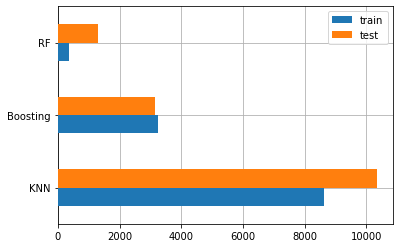

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Berdasarkan hasil diatas, kita mengetahui bahwa model Random Forest memiliki performa yang paling tinggi, ditandai dengan nilai MSE yang paling kecil baik pada dataset latih atau uji.

## Prediction

Melakukan prediksi harga dengan menggunakan ketiga algoritma untuk melihat model yang paling baik

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
11495,23995,14560.1,23367.9,19105.9


Berdasarkan hasil prediksi, kita mengetahui bahwa Random Forest memiliki performa paling baik (nilai prediksi paling mendekati harga sebenarnya) sehingga kita akan menggunakannya untuk prediksi harga penjualan mobil.